In [9]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#import tensorflow
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.fftpack import fft, fftfreq

## Datei einlesen

In [10]:
cwd = os.getcwd()
src_dir = os.path.join(cwd, os.pardir)
data_dir = os.path.join(src_dir, 'data')

raw_sound_data, samplerate = sf.read(data_dir + '/11_1.flac')

# Konvertierung in ein angenehmeres Format 
sound_data = {}
#sound_data['front-left'] = [x[2] for x in raw_sound_data]
#sound_data['front-right'] = [x[3] for x in raw_sound_data]
sound_data['back-left'] = [x[0] for x in raw_sound_data]
#sound_data['back-right'] = [x[1] for x in raw_sound_data]

## Plot der ersten Sekunde

Funktion zum umwandeln der Timestamps zu konkreten Indizes im Waveform Array

In [15]:
def sample_index(timestamp):
    return round(timestamp * samplerate, 0)

Plot

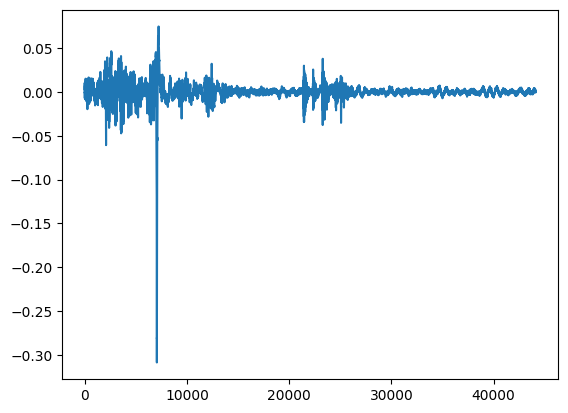

In [19]:
plt.plot(sound_data['back-left'][sample_index(0):sample_index(1)])
plt.show()

## FFT

### no whistle
FFT für eine Sekunde ohne Pfiff

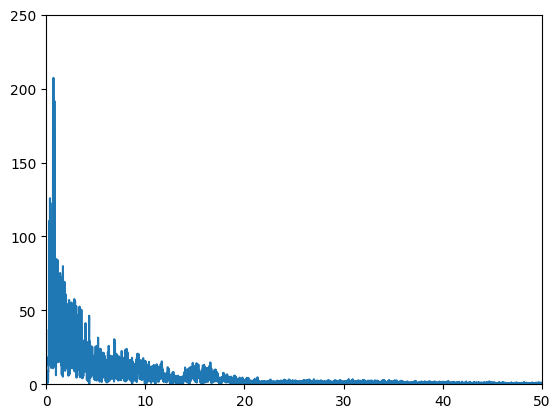

In [20]:
fft_data = fft(sound_data['back-left'][sample_index(211):sample_index(212)])
fft_freq = fftfreq(sample_index(212) - sample_index(211), 1 / 441000)
plt.plot(fft_freq[:fft_freq.size // 2] / 1000, np.abs(fft_data)[:fft_data.size // 2])
plt.axis([0, 50, 0, 250])
plt.show()

### whistle
FFT für eine Sekunde mit Pfiff

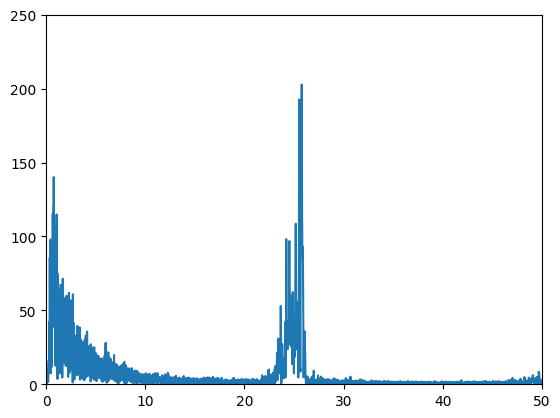

In [21]:
fft_data = fft(sound_data['back-left'][sample_index(212):sample_index(213)])
fft_freq = fftfreq(sample_index(213) - sample_index(212), 1 / 441000)
plt.plot(fft_freq[:fft_freq.size // 2] / 1000, np.abs(fft_data)[:fft_data.size // 2])
plt.axis([0, 50, 0, 250])
plt.show()